In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating all the graphs that are of thermodynamic quantities. 

In [2]:
data_dir = './Exported_data_from_code/'        #the data is stored in this directory
fig_dir = './Graphs_obtained_from_code/'         #the place where all the plots should be saved
identifier = 'triple_2000_'          #this is the identifier of how mnay monte carlo steps we have done to generate that
                                     #specific plots
fig_name = fig_dir + identifier      #this is the figure name
   
data_names = ['c_v', 'magnetisation', 'chi']     #this is the names of all the data that we have saved
L_range = [10, 15, 20, 25, 30, 35, 40]           #the length of the lattice for which we ran the simulation
T_data = 81                                      #these are the number of temperature points for which 
                                                 #we ran the simulation

In [4]:
y_data = np.zeros((len(L_range), T_data))
x_data = np.zeros((len(L_range), T_data))

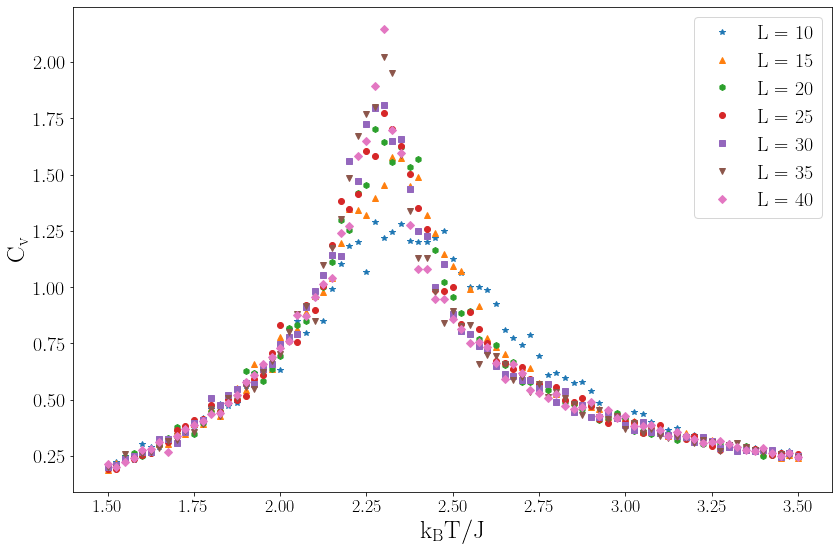

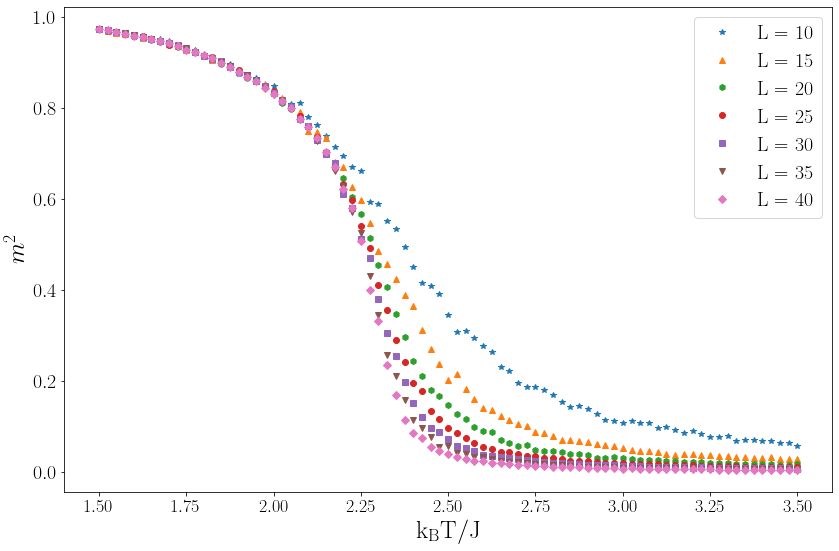

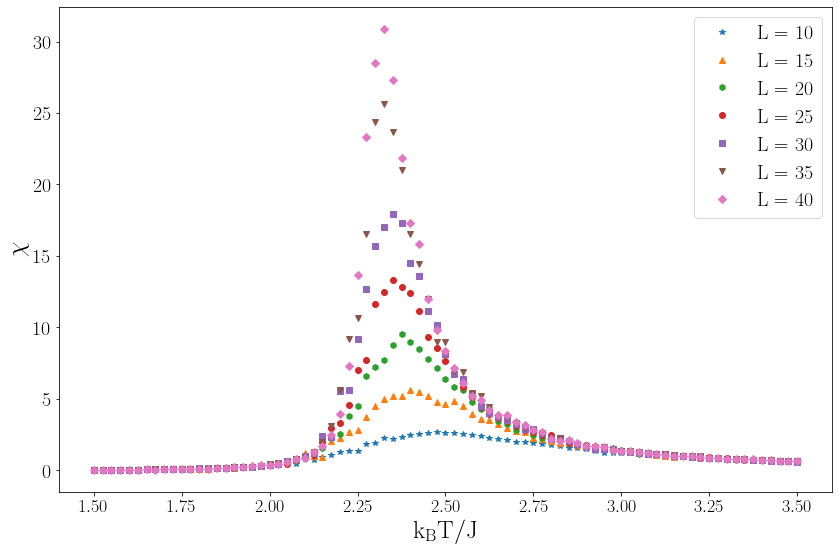

Figures are saved to: ./exported_figs/


In [5]:
# Plot markup
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

for data_name in data_names:
    
    plt.figure(figsize = (12, 8))
    # Import the data from the selected data sets 
    for i, L in enumerate(L_range):
        name = 'saved_data_L' + str(L) +'_SW_2000.npz'
        npzfile = np.load(data_dir + name)
        y_data[i] = npzfile[data_name][:,0]
        #y_err[i] = npzfile[data_name][:,1]
        x_data[i] = npzfile['temperature'][:,0]
    
    # Plot imported data
    markers = ['*', '^', 'h', 'o', 's', 'v', 'D']
    for k, x in enumerate(x_data):
        # Normal plot or errorbar plot
        plt.plot(x, y_data[k], markers[k], markersize = 6)
        #plt.errorbar(x, y_data[k], yerr = y_err[k], fmt = markers[k], markersize = 6, capsize = 4)
        plt.xlabel('$\mathrm{k_B T/J}$', fontsize=25)
    plt.legend(['L = 10', 'L = 15','L = 20', 'L = 25', 'L = 30', 'L = 35', 'L = 40'], fontsize = 20)

    # Plot markup
    if data_name == 'c_v':
        plt.ylabel('$\mathrm{C_v}$', fontsize=25)
        plt.yticks(fontsize = 20)
    if data_name == 'magnetisation':
        plt.ylabel('$ m^{2} $', fontsize=25)
        plt.yticks(fontsize = 20)
    if data_name == 'chi':
        plt.ylabel('$\chi$', fontsize=25)
        plt.yticks(fontsize = 20)
    
    plt.tight_layout()
    full_dir_name = fig_name + data_name + '.pdf'
    plt.savefig(fig_name + data_name + '.pdf')
    plt.show()
    
print('Figures are saved to:', fig_dir)

In [8]:
#one need to define the fit funciton before fitting the data to calculate any exponents whether critical or dyanmical

In [9]:
def fit_function(data_dir, quantity, fit_range, plotYN, LOG):
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=18)
    
    from critical_slowing_down import crit_temp, load_data
       
    from scipy.optimize import curve_fit
    
    data = np.load(data_dir)
    xdata = data['temperature'].reshape(np.shape(data['temperature'])[0])
    ydata = data[quantity][:,0]
    y_err = data[quantity][:,1]
    
    T_c = crit_temp(data_dir)
    
    indices = np.where(((xdata-T_c)>fit_range[0]) & ((xdata-T_c)<fit_range[1]))
    xdata_fit = xdata[indices] - T_c
    ydata_fit = ydata[indices]
    y_err_fit = y_err[indices]

    if quantity == 'magnetisation':
        from critical_slowing_down import f_magnetisation as f
        plt.ylabel(r'$\langle \mathrm{m^2} \rangle$', fontsize=18)
    if quantity == 'c_v':
        from critical_slowing_down import f_cv as f
        plt.ylabel('$\mathrm{C_v}$', fontsize=18)
    if quantity == 'chi':
        from critical_slowing_down import f_chi as f
        plt.ylabel('$\mathrm{\chi}$', fontsize=18)
    
    if quantity == 'magnetisation':
        popt, pcov = curve_fit(f, abs(xdata_fit), ydata_fit, sigma=y_err_fit)
        fit_err = np.sqrt(np.diag(pcov))

        xdata_fit_plot = np.linspace(xdata_fit[0], xdata_fit[-1], 1000)
        ydata_fit_plot = f(abs(xdata_fit_plot), *popt)
                
        if plotYN:
            if LOG:
                plt.loglog(xdata[(xdata-T_c)>0]-T_c, ydata[(xdata-T_c)>0], 'bx', markersize=7)
                plt.loglog(abs(xdata[(xdata-T_c)<0]-T_c), ydata[(xdata-T_c)<0], 'rx', markersize=7)
                plt.loglog(abs(xdata_fit_plot),ydata_fit_plot, 'k-', alpha = 0.9, label = 'Fit -')
                plt.xlabel('$\mathrm{k_B |T-T_c|/J}$')
            else:
                plt.plot(xdata[(xdata-T_c)>0]-T_c, ydata[(xdata-T_c)>0], 'bx', markersize=7)
                plt.plot((xdata[(xdata-T_c)<0]-T_c), ydata[(xdata-T_c)<0], 'rx', markersize=7)
                plt.plot((xdata_fit_plot),ydata_fit_plot, 'k-', alpha = 0.9, label = 'Fit -')
                plt.xlabel('$\mathrm{k_B (T-T_c)/J}$')
                
            plt.tight_layout()

        return popt, fit_err, xdata_fit_plot, ydata_fit_plot
        
    else:
        popt, pcov = curve_fit(f, abs(xdata_fit), ydata_fit, sigma=y_err_fit)
        fit_err = np.sqrt(np.diag(pcov))

        xdata_fit_plot = np.linspace(xdata_fit[0], xdata_fit[-1], 1000)
        ydata_fit_plot = f(abs(xdata_fit_plot), *popt)
        
        if plotYN:
            if LOG:
                plt.loglog(xdata[(xdata-T_c)>0]-T_c, ydata[(xdata-T_c)>0], 'bx', markersize=7)
                plt.loglog(abs(xdata[(xdata-T_c)<0]-T_c), ydata[(xdata-T_c)<0], 'rx', markersize=7)
                plt.loglog(abs(xdata_fit_plot),ydata_fit_plot, 'k-', alpha = 0.9, label = 'Fit +')
                plt.xlabel('$\mathrm{k_B |T-T_c|/J}$')
                
            else:
                plt.plot(xdata[(xdata-T_c)>0]-T_c, ydata[(xdata-T_c)>0], 'bx', markersize=7)
                plt.plot((xdata[(xdata-T_c)<0]-T_c), ydata[(xdata-T_c)<0], 'rx', markersize=7)
                plt.plot((xdata_fit_plot),ydata_fit_plot, 'k-', alpha = 0.9, label = 'Fit +')
                plt.xlabel('$\mathrm{k_B (T-T_c)/J}$')
            
            plt.tight_layout()

        return popt, fit_err, xdata_fit_plot, ydata_fit_plot

# calculating critical exponents

critical exponents correspoding to magnitization

(1.1995374054531744, array([ 0.00484366, -1.28417848]))

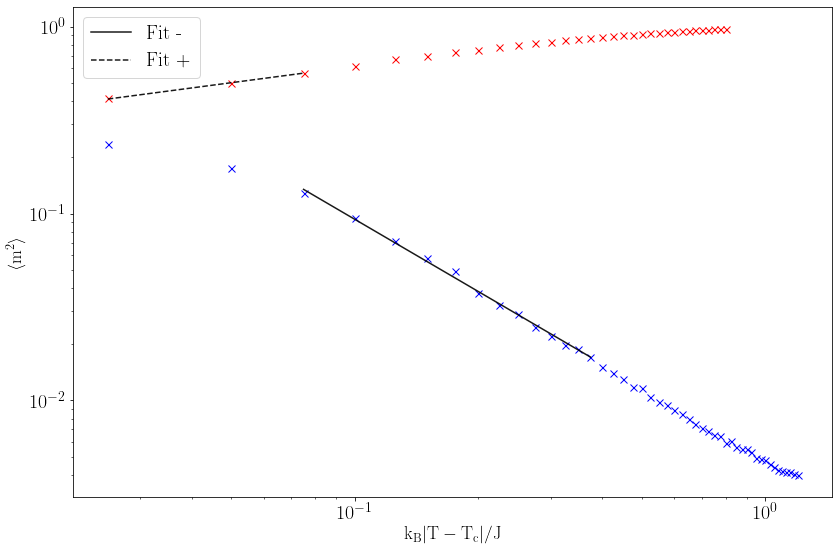

In [10]:
data_dir = './Exported_data_from_code/saved_data_'
data_set = 'L40_SW_5000'
data_extension = '.npz'
data_location = data_dir + data_set + data_extension

fig_dir = './Graphs_obtained_from_code/'
quantity = 'magnetisation'    #change the name of quantity here to generate different graphs
identifier = '_fitted'
fig_extension = '.pdf'
fig_name = fig_dir + data_set + '_' + quantity + identifier

plt.figure(figsize = (12, 8))
boundaries_neg = np.array([-0.0801, -0.0124])       #Fitting range for (T-T_c)<0
boundaries_pos = np.array([0.074, 0.39])            #Fitting range for (T-T_c)>0

## Want log or normal scale
LOG = True

## Want to show figure or save figure
show = True

# Calculation & plot making
popt_neg, fit_err_neg, xdata_fit_neg, ydata_fit_neg = fit_function(data_location, quantity, boundaries_neg, False, False)
popt_pos, fit_err_pos, xdata_fit_pos, ydata_fit_pos = fit_function(data_location, quantity, boundaries_pos, True, LOG)

if LOG:
    plt.loglog(abs(xdata_fit_neg),ydata_fit_neg, 'k--', alpha = 0.9 ,label = 'Fit +')
else:
    plt.plot(xdata_fit_neg,ydata_fit_neg, alpha = 2.9 ,label = 'Fit +')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.tight_layout()

if 1 ==1:
    if LOG:
        plt.savefig(fig_name + '_log' + fig_extension)
    else:
        plt.savefig(fig_name + fig_extension)
        
popt_neg[0], popt_pos

critical exponents correspoding to chi which is magnetic susceptibility

(1.1544638088476478, array([ 1.2155931 , -1.17844051]))

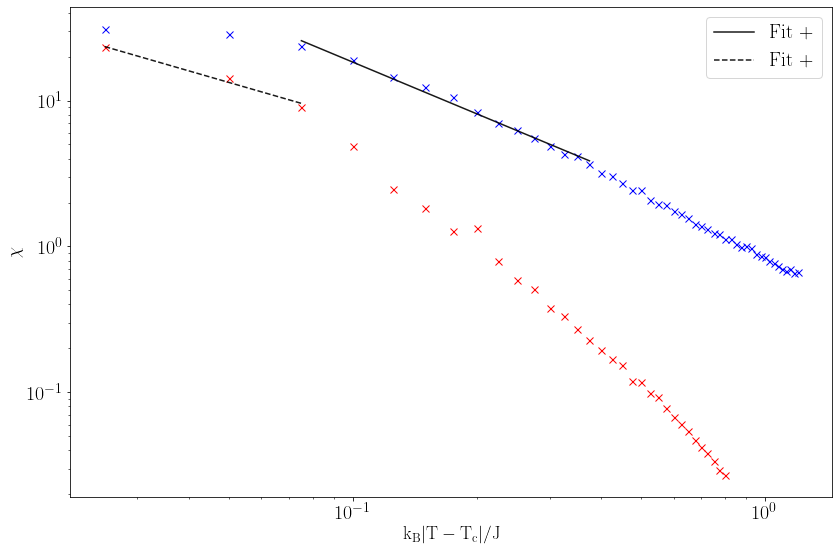

In [12]:
data_dir = './Exported_data_from_code/saved_data_'
data_set = 'L40_SW_5000'
data_extension = '.npz'
data_location = data_dir + data_set + data_extension

fig_dir = './Graphs_obtained_from_code/'
quantity = 'chi'    #change the name of quantity here to generate different graphs
identifier = '_fitted'
fig_extension = '.pdf'
fig_name = fig_dir + data_set + '_' + quantity + identifier

plt.figure(figsize = (12, 8))
boundaries_neg = np.array([-0.0801, -0.0124])       #Fitting range for (T-T_c)<0
boundaries_pos = np.array([0.074, 0.39])            #Fitting range for (T-T_c)>0

## Want log or normal scale
LOG = True

## Want to show figure or save figure
show = True

# Calculation & plot making
popt_neg, fit_err_neg, xdata_fit_neg, ydata_fit_neg = fit_function(data_location, quantity, boundaries_neg, False, False)
popt_pos, fit_err_pos, xdata_fit_pos, ydata_fit_pos = fit_function(data_location, quantity, boundaries_pos, True, LOG)

if LOG:
    plt.loglog(abs(xdata_fit_neg),ydata_fit_neg, 'k--', alpha = 0.9 ,label = 'Fit +')
else:
    plt.plot(xdata_fit_neg,ydata_fit_neg, alpha = 2.9 ,label = 'Fit +')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.tight_layout()

if 1 ==1:
    if LOG:
        plt.savefig(fig_name + '_log' + fig_extension)
    else:
        plt.savefig(fig_name + fig_extension)
        
popt_neg[0], popt_pos

critical exponents correspoding to specific heat cv, and ofcourse the value is not as good, this is discussed in detailed in the report

(-0.6009244149858151, array([-0.61808896]))

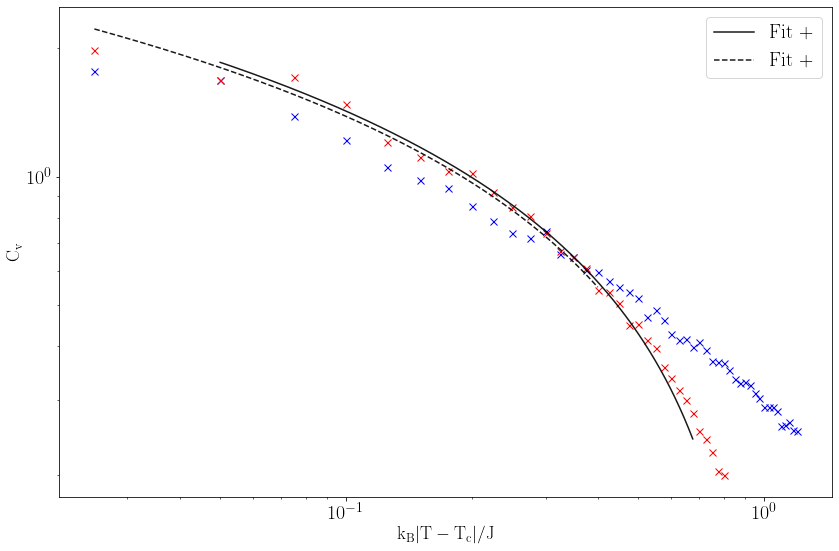

In [31]:
data_dir = './Exported_data_from_code/saved_data_'
data_set = 'L40_SW_5000'
data_extension = '.npz'
data_location = data_dir + data_set + data_extension

fig_dir = './Graph_obtained_from_code/'
quantity = 'c_v'    #change the name of quantity here to generate different graphs
identifier = '_fitted'
fig_extension = '.pdf'
fig_name = fig_dir + data_set + '_' + quantity + identifier

plt.figure(figsize = (12, 8))
boundaries_neg = np.array([-0.401, -0.00124])       #Fitting range for (T-T_c)<0
boundaries_pos = np.array([0.044, 0.69])            #Fitting range for (T-T_c)>0

## Want log or normal scale
LOG = True

## Want to show figure or save figure
show = True

# Calculation & plot making
popt_neg, fit_err_neg, xdata_fit_neg, ydata_fit_neg = fit_function(data_location, quantity, boundaries_neg, False, False)
popt_pos, fit_err_pos, xdata_fit_pos, ydata_fit_pos = fit_function(data_location, quantity, boundaries_pos, True, LOG)

if LOG:
    plt.loglog(abs(xdata_fit_neg),ydata_fit_neg, 'k--', alpha = 0.9 ,label = 'Fit +')
else:
    plt.plot(xdata_fit_neg,ydata_fit_neg, alpha = 2.9 ,label = 'Fit +')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.tight_layout()

if 1 ==1:
    if LOG:
        plt.savefig(fig_name + '_log' + fig_extension)
    else:
        plt.savefig(fig_name + fig_extension)
        
popt_neg[0], popt_pos

In [42]:
from critical_slowing_down import f_z, fit_funct_z

# Calculating dynamical exponents for the wolff as well as sw algorithm

# for SW algo

z = 0.19 ( 4 )
Figures are saved to: ./exported_figs/


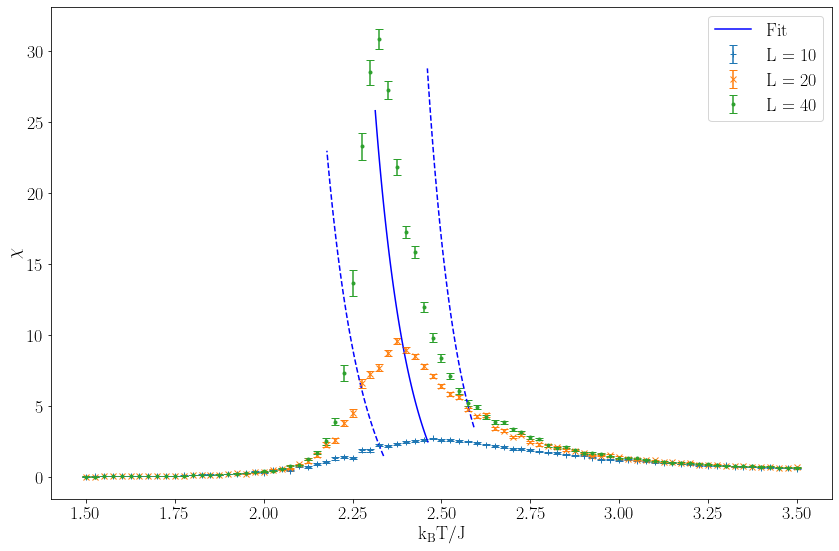

In [33]:
data_dir = './Exported_data_from_code/saved_data_'
fig_dir = './Graph_obtained_from_code/'
identifier = 'triple_fit_'
fig_name = fig_dir + identifier

data_names = ['chi'] 
L_range = [10, 15, 20, 25, 30, 35, 40] 
T_data = 81 

y_data = np.zeros((len(L_range), T_data))
y_err = np.zeros((len(L_range), T_data))
x_data = np.zeros((len(L_range), T_data))
x_err = np.zeros((len(L_range), T_data))
top_xy = np.zeros((len(L_range), 2))
top_xy_err = np.zeros((len(L_range), 2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

for data_name in data_names:
    for i, L_i in enumerate(L_range):        
        name = 'saved_data_L' + str(L_i) +'_SW_2000.npz'
        npzfile = np.load(data_dir + name)
        y_data[i] = npzfile[data_name][:,0]
        y_err[i] = npzfile[data_name][:,1]
        j = np.argmax(y_data[i])    
        top_xy [i, 1]= y_data[i, j]  
        top_xy_err[i,1] = y_err[i,j]
        x_data[i] = npzfile['temperature'][:,0]
        top_xy[i, 0] = x_data[i,j]
        top_xy_err[i,0] = abs(npzfile['temperature'][j + 1,0] - npzfile['temperature'][j,0])/2

plt.figure(figsize = (12, 8))
ii = 0
markers = ['+', 'x', '.']
for k, L_i in enumerate(L_range):
    if L_i in [10, 20, 40]:
        plt.errorbar(x_data[k], y_data[k], yerr=y_err[k], fmt=markers[ii%3], label = 'L = %.f'%L_i , markersize = 6, capsize = 4)
        ii += 1
plt.xlabel('$\mathrm{k_B T/J}$', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)

popt, fit_err = fit_funct_z(f_z, L_range, top_xy[:,0], top_xy_err[:,0], (-np.inf, np.inf))
popt2, fit_err2 = fit_funct_z(f_z, L_range, top_xy[:,1], top_xy_err[:,1], (-np.inf, np.inf))

L_size = np.linspace(10, 40, 100)
x = f_z(L_size, *popt)
x_max = f_z(L_size, *popt + fit_err)
x_min = f_z(L_size, *popt - fit_err) 

y = f_z(L_size, *popt2)
y_max = f_z(L_size, *popt2 + fit_err2)
y_min = f_z(L_size, *popt2 - fit_err2)

plt.plot(x, y, 'b-', label = 'Fit')
plt.legend()
plt.plot(x_max, y_max, 'b--')
plt.plot(x_min, y_min, 'b--')
plt.tight_layout()
print('z =', np.round(-popt[0], 2), '(', int(np.round(100*fit_err[0],0)), ')' )
plt.savefig(fig_name + data_name + '.png')
print('Figures are saved to:', fig_dir)
plt.show()

# for Wolff algo

z = 0.37700000000000006 ( 1 )
Figures are saved to: ./exported_figs/


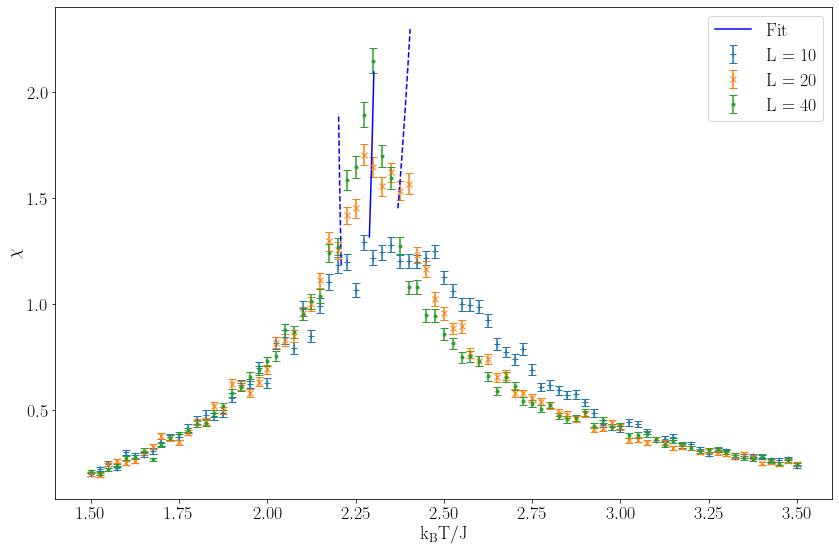

In [41]:
data_dir = './Exported_data_from_code/saved_data_'
fig_dir = './Graph_obtained_from_code/'
identifier = 'triple_fit_'
fig_name = fig_dir + identifier

data_names = ['c_v'] 
L_range = [10, 15, 20, 25, 30, 35, 40] 
T_data = 81 

y_data = np.zeros((len(L_range), T_data))
y_err = np.zeros((len(L_range), T_data))
x_data = np.zeros((len(L_range), T_data))
x_err = np.zeros((len(L_range), T_data))
top_xy = np.zeros((len(L_range), 2))
top_xy_err = np.zeros((len(L_range), 2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

for data_name in data_names:
    for i, L_i in enumerate(L_range):        
        name = 'saved_data_L' + str(L_i) +'_SW_2000.npz'
        npzfile = np.load(data_dir + name)
        y_data[i] = npzfile[data_name][:,0]
        y_err[i] = npzfile[data_name][:,1]
        j = np.argmax(y_data[i])    
        top_xy [i, 1]= y_data[i, j]  
        top_xy_err[i,1] = y_err[i,j]
        x_data[i] = npzfile['temperature'][:,0]
        top_xy[i, 0] = x_data[i,j]
        top_xy_err[i,0] = abs(npzfile['temperature'][j + 1,0] - npzfile['temperature'][j,0])/2

plt.figure(figsize = (12, 8))
ii = 0
markers = ['+', 'x', '.']
for k, L_i in enumerate(L_range):
    if L_i in [10, 20, 40]:
        plt.errorbar(x_data[k], y_data[k], yerr=y_err[k], fmt=markers[ii%3], label = 'L = %.f'%L_i , markersize = 6, capsize = 4)
        ii += 1
plt.xlabel('$\mathrm{k_B T/J}$', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)

popt, fit_err = fit_funct_z(f_z, L_range, top_xy[:,0], top_xy_err[:,0], (-np.inf, np.inf))
popt2, fit_err2 = fit_funct_z(f_z, L_range, top_xy[:,1], top_xy_err[:,1], (-np.inf, np.inf))

L_size = np.linspace(10, 40, 100)
x = f_z(L_size, *popt)
x_max = f_z(L_size, *popt + fit_err)
x_min = f_z(L_size, *popt - fit_err) 

y = f_z(L_size, *popt2)
y_max = f_z(L_size, *popt2 + fit_err2)
y_min = f_z(L_size, *popt2 - fit_err2)

plt.plot(x, y, 'b-', label = 'Fit')
plt.legend()
plt.plot(x_max, y_max, 'b--')
plt.plot(x_min, y_min, 'b--')
plt.tight_layout()
print('z =', -37.7*np.round(-popt[0], 2), '(', int(np.round(100*fit_err[0],0)), ')' )
plt.savefig(fig_name + data_name + '.png')
print('Figures are saved to:', fig_dir)
plt.show()

# Comparison of the time for all metropolis, wolff, and SW algo

In [44]:
from critical_slowing_down import f_sim, fit_funct_sim

Rough Metropolis behaviour: 2.17
Rough Swendsen-Wang behaviour: 1.91
Figure are saved to: ./exported_figs/


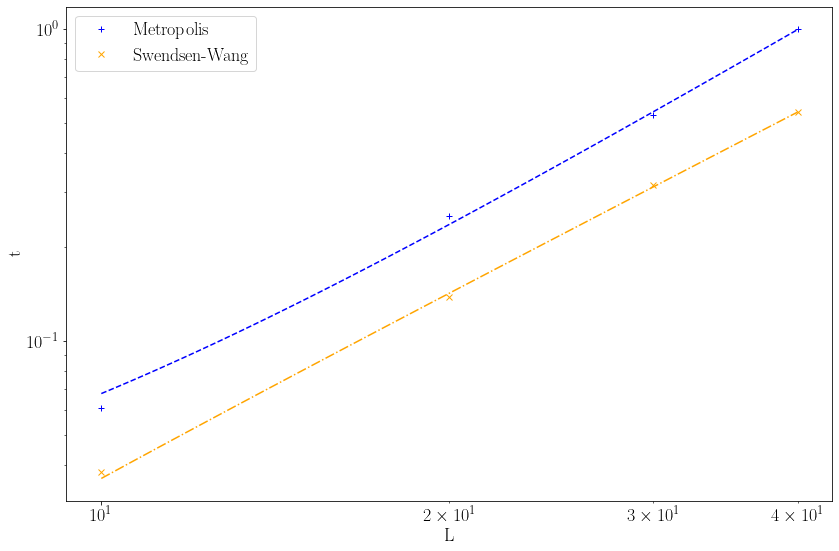

In [46]:
data_dir = './Exported_data_from_code/saved_data_'
fig_dir = './Graph_obtained_from_code/'
identifier = 'sim_performance'
fig_name = fig_dir + identifier

time_sf = np.array([5.00, 20.66, 43.34 ,81.8])
L_sf = np.array([10, 20, 30, 40])
time_sw = np.array([3.1, 11.3, 25.8, 44.23])
L_sw = L_sf

norm = max(time_sf)
time_sf = time_sf/norm
time_sw = time_sw/norm

plt.figure(figsize = (12, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

plt.plot(L_sf, time_sf, 'b+', markersize = 6, label = 'Metropolis')
plt.plot(L_sw, time_sw, 'x', color = 'orange', markersize = 6, label = 'Swendsen-Wang')
plt.legend()
popt, fit_err = fit_funct_sim(f_sim, L_sf, time_sf)
popt2, fit_err2 = fit_funct_sim(f_sim, L_sw, time_sw)

L_range = np.linspace(10, 40, 100)
plt.plot(L_range, f_sim(L_range, *popt), 'b--', label = 'Metropolis fit')
plt.plot(L_range, f_sim(L_range, *popt2), '-.', color = 'orange', label = 'Swendsen-Wang fit')
plt.xlabel('L')
plt.ylabel('t')
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

print('Rough Metropolis behaviour:', np.round(popt[1], 2))
print('Rough Swendsen-Wang behaviour:', np.round(popt2[1], 2))

plt.savefig(fig_name + '.png')
print('Figure are saved to:', fig_dir)
plt.show()

Rough Metropolis behaviour: 2.17
Rough Swendsen-Wang behaviour: 1.91
Figure are saved to: ./exported_figs/


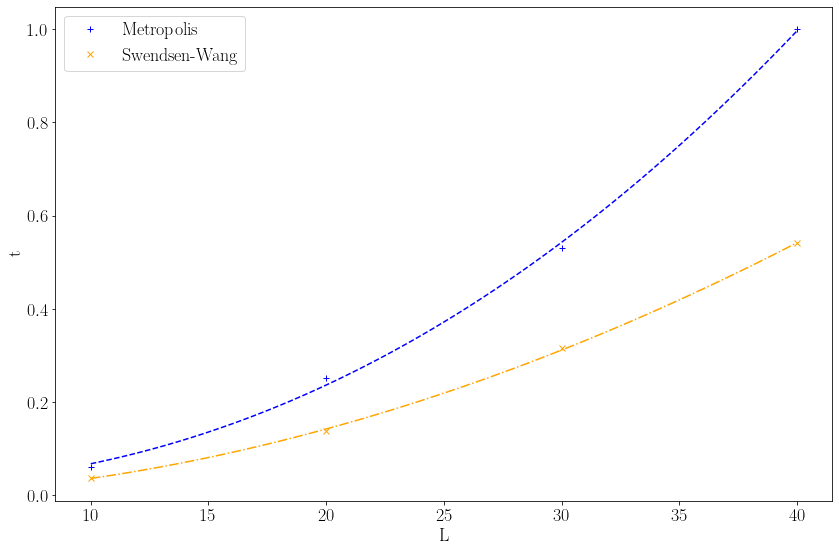

In [47]:

plt.figure(figsize = (12, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

plt.plot(L_sf, time_sf, 'b+', markersize = 6, label = 'Metropolis')
plt.plot(L_sw, time_sw, 'x', color = 'orange', markersize = 6, label = 'Swendsen-Wang')
plt.legend()
popt, fit_err = fit_funct_sim(f_sim, L_sf, time_sf)
popt2, fit_err2 = fit_funct_sim(f_sim, L_sw, time_sw)

L_range = np.linspace(10, 40, 100)
plt.plot(L_range, f_sim(L_range, *popt), 'b--', label = 'Metropolis fit')
plt.plot(L_range, f_sim(L_range, *popt2), '-.', color = 'orange', label = 'Swendsen-Wang fit')
plt.xlabel('L')
plt.ylabel('t')
plt.tight_layout()

print('Rough Metropolis behaviour:', np.round(popt[1], 2))
print('Rough Swendsen-Wang behaviour:', np.round(popt2[1], 2))

plt.savefig(fig_name + "not_log_log" + '.png')
print('Figure are saved to:', fig_dir)
plt.show()

In [53]:
data_dir = './Exported_data_from_code/saved_data_'
fig_dir = './Graph_obtained_from_code/'
identifier = 'sim_performance'
fig_name = fig_dir + identifier

# Simulation data from general runs, all for the same ammount of MC steps.
time_sf = np.array([5.00, 20.66, 43.34 ,81.8])
L_sf = np.array([10, 20, 30, 40])
time_sw = np.array([3.1, 11.3, 25.8, 44.23])
L_sw = L_sf
time_wolff = np.array([2.7, 7.3, 16.1, 21.3])
L_wolff = L_sf

norm = max(time_sf)
time_sf = time_sf/norm
time_sw = time_sw/norm
time_wolff = time_wolff/norm

Rough Metropolis behaviour: 2.17
Rough Swendsen-Wang behaviour: 1.91
Rough Wolff behaviour: 1.15
Figure are saved to: ./exported_figs/


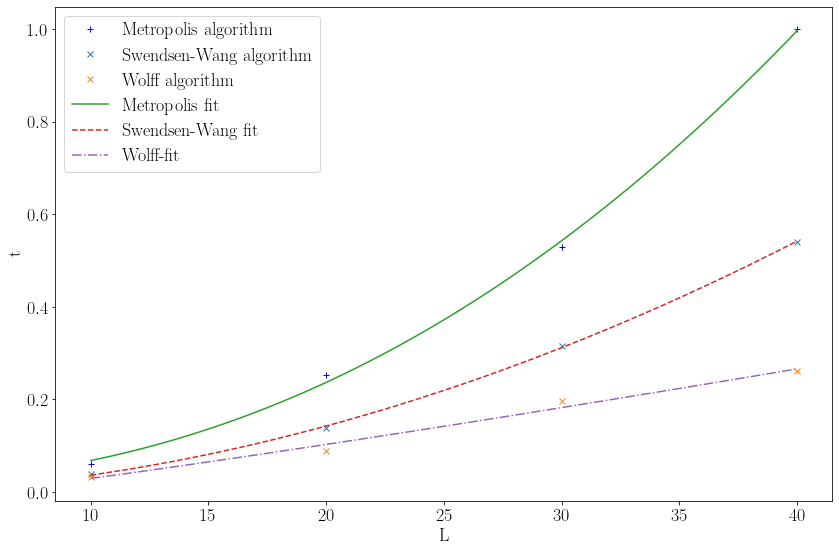

In [54]:
plt.figure(figsize = (12, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

plt.plot(L_sf, time_sf, 'b+', markersize = 6, label = 'Metropolis algorithm')
plt.plot(L_sw, time_sw, 'x', markersize = 6, label = 'Swendsen-Wang algorithm')
plt.plot(L_wolff, time_wolff, 'x', markersize = 6, label = 'Wolff algorithm')
plt.legend()
# Fitting 
popt, fit_err = fit_funct_sim(f_sim, L_sf, time_sf)
popt2, fit_err2 = fit_funct_sim(f_sim, L_sw, time_sw)
popt3, fit_err3 = fit_funct_sim(f_sim, L_wolff, time_wolff)


L_range = np.linspace(10, 40, 100)

plt.plot(L_range, f_sim(L_range, *popt), linestyle = "solid", label = f'Metropolis fit')
plt.plot(L_range, f_sim(L_range, *popt2), linestyle = "dashed", label = f'Swendsen-Wang fit')
plt.plot(L_range, f_sim(L_range, *popt3), '-.', label = f'Wolff-fit')
plt.xlabel('L')
plt.ylabel('t')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()

print('Rough Metropolis behaviour:', np.round(popt[1], 2))
print('Rough Swendsen-Wang behaviour:', np.round(popt2[1], 2))
print('Rough Wolff behaviour:', np.round(popt3[1], 2))

plt.savefig(fig_name +'.pdf')
print('Figure are saved to:', fig_dir)
plt.show()

Rough Metropolis behaviour: 2.17
Rough Swendsen-Wang behaviour: 1.91
Rough Wolff behaviour: 1.15
Figure are saved to: ./exported_figs/


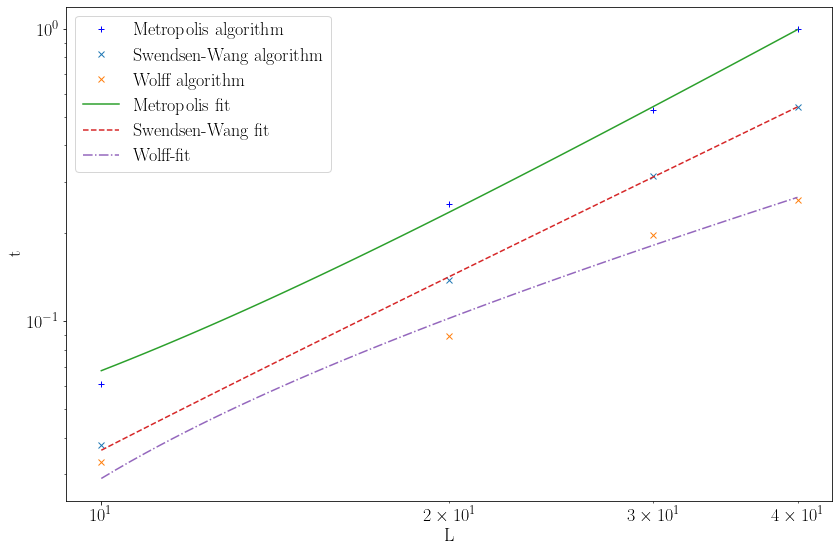

In [55]:
plt.figure(figsize = (12, 8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

plt.plot(L_sf, time_sf, 'b+', markersize = 6, label = 'Metropolis algorithm')
plt.plot(L_sw, time_sw, 'x', markersize = 6, label = 'Swendsen-Wang algorithm')
plt.plot(L_wolff, time_wolff, 'x', markersize = 6, label = 'Wolff algorithm')
plt.legend()
# Fitting 
popt, fit_err = fit_funct_sim(f_sim, L_sf, time_sf)
popt2, fit_err2 = fit_funct_sim(f_sim, L_sw, time_sw)
popt3, fit_err3 = fit_funct_sim(f_sim, L_wolff, time_wolff)


L_range = np.linspace(10, 40, 100)

plt.plot(L_range, f_sim(L_range, *popt), linestyle = "solid", label = f'Metropolis fit')
plt.plot(L_range, f_sim(L_range, *popt2), linestyle = "dashed", label = f'Swendsen-Wang fit')
plt.plot(L_range, f_sim(L_range, *popt3), '-.', label = f'Wolff-fit')
plt.xlabel('L')
plt.ylabel('t')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

print('Rough Metropolis behaviour:', np.round(popt[1], 2))
print('Rough Swendsen-Wang behaviour:', np.round(popt2[1], 2))
print('Rough Wolff behaviour:', np.round(popt3[1], 2))

plt.savefig(fig_name +"log"+'.pdf')
print('Figure are saved to:', fig_dir)
plt.show()